In [2]:
import os
import string
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image  # Import the entire PIL module
import scipy

In [3]:

# Define the base directory
base_dir = "C:\\Users\\navya\\OneDrive\\Desktop\\ASLProject\\project\\dataSet"

# Creating the directory Structure
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

training_data_dir = os.path.join(base_dir, "trainingData")
testing_data_dir = os.path.join(base_dir, "testingData")

if not os.path.exists(training_data_dir):
    os.makedirs(training_data_dir)

if not os.path.exists(testing_data_dir):
    os.makedirs(testing_data_dir)

# Making Folders from A to Z in the training and testing data folders respectively
for char in string.ascii_uppercase:
    training_char_dir = os.path.join(training_data_dir, char)
    testing_char_dir = os.path.join(testing_data_dir, char)

    if not os.path.exists(training_char_dir):
        os.makedirs(training_char_dir)

    if not os.path.exists(testing_char_dir):
        os.makedirs(testing_char_dir)


# Image Data Generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Training and Testing Data Generators
training_set = train_datagen.flow_from_directory(training_data_dir,
                                                 target_size=(128, 128),
                                                 batch_size=10,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(testing_data_dir,
                                            target_size=(128, 128),
                                            batch_size=10,
                                            color_mode='grayscale',
                                            class_mode='categorical')

Found 12534 images belonging to 27 classes.
Found 4267 images belonging to 27 classes.


In [5]:
# Model Definition
classifier = tf.keras.models.Sequential()

classifier.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[128, 128, 1]))
classifier.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
classifier.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
classifier.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
classifier.add(tf.keras.layers.Flatten())
classifier.add(tf.keras.layers.Dense(units=128, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.40))
classifier.add(tf.keras.layers.Dense(units=96, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.40))
classifier.add(tf.keras.layers.Dense(units=27, activation='softmax'))  # Update to 27 classes
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
classifier.summary()

# Model Training
history = classifier.fit(training_set, epochs=7, validation_data=test_set)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_3 (Dense)             (None, 128)              

Epoch 1: Training Accuracy - 0.41096219420433044, Validation Accuracy - 0.8914928436279297
Epoch 2: Training Accuracy - 0.7430189847946167, Validation Accuracy - 0.9835950136184692
Epoch 3: Training Accuracy - 0.8468166589736938, Validation Accuracy - 0.9896882772445679
Epoch 4: Training Accuracy - 0.8857507705688477, Validation Accuracy - 0.992734968662262
Epoch 5: Training Accuracy - 0.9054571390151978, Validation Accuracy - 0.9962502717971802
Epoch 6: Training Accuracy - 0.9146322011947632, Validation Accuracy - 0.9971877336502075
Epoch 7: Training Accuracy - 0.9330620765686035, Validation Accuracy - 0.9976564049720764


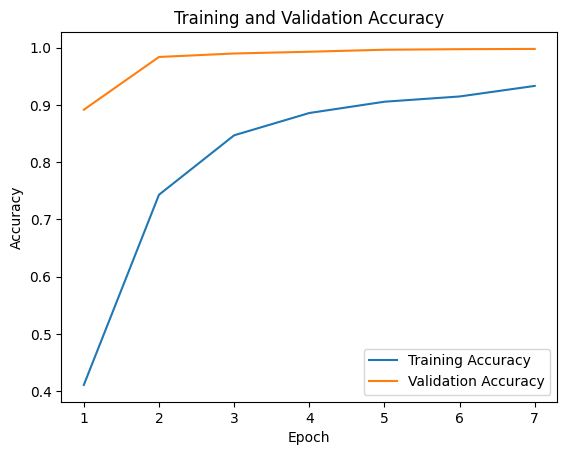

In [6]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

for epoch, acc, val_acc in zip(range(1, len(accuracy) + 1), accuracy, val_accuracy):
    print(f'Epoch {epoch}: Training Accuracy - {acc}, Validation Accuracy - {val_acc}')

# Visualize Training and Validation Accuracy
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1: Training Loss - 1.9343976974487305, Validation Loss - 0.3649345636367798
Epoch 2: Training Loss - 0.7648922801017761, Validation Loss - 0.07302989810705185
Epoch 3: Training Loss - 0.47233444452285767, Validation Loss - 0.038983337581157684
Epoch 4: Training Loss - 0.34617918729782104, Validation Loss - 0.022723138332366943
Epoch 5: Training Loss - 0.29350194334983826, Validation Loss - 0.017216743901371956
Epoch 6: Training Loss - 0.2540819048881531, Validation Loss - 0.010741418227553368
Epoch 7: Training Loss - 0.20937654376029968, Validation Loss - 0.00923397857695818


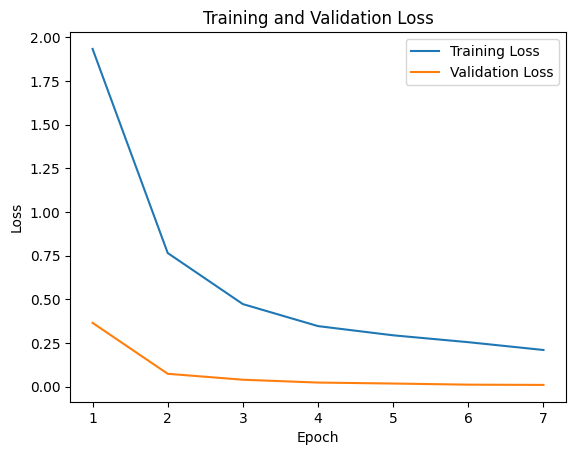

In [7]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

for epoch, los, val_los in zip(range(1, len(loss) + 1), loss, val_loss):
    print(f'Epoch {epoch}: Training Loss - {los}, Validation Loss - {val_los}')

# Visualize Training and Validation Loss
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
model_json = classifier.to_json()
with open("modimg.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
classifier.save_weights('modimg.h5')
print('Weights saved')

Model Saved
Weights saved


In [9]:
!pip install pydot pydotplus


     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     ------------------------------ ------- 225.3/278.7 kB 6.9 MB/s eta 0:00:01
     -------------------------------------- 278.7/278.7 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24588 sha256=e9e71bde45441cb00ffd0bb5c7fe68d8c2836fc7d78e1c00c82e145d97b7fe18
  Stored in directory: c:\users\navya\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


In [13]:
from tensorflow.keras.utils import plot_model
# Save the model architecture as a PNG image
plot_model(classifier, to_file='modelarc.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
